<a href="https://colab.research.google.com/github/decci027/datascience_a2/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

Some sources used to help with my responses:
https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
https://www.cs.toronto.edu/~vasu/posts/regularization.html

**Task1**:

Does elpd_loo mean anything if we only have one model?



The purpose of elpd_loo is to give a number summary of which of the two model is better. However, having only one model does not give any meaning for elpd_loo. I discussed this with the teacher, and he said that if elpd_loo gave a negative number summary for one model then I can not confirm what if the model I am using is 'best' for my dataset. However, if I compare with another model than depending on the number summary I can determine which one is better even if the number summary output the models gave me were negative or positive.

**Task2**:

Describe overfitting, in the context of this course

(letting our model get distracted by unnecessary information)

Overfitting is a modeling error that occurs when a function is too closely aligned to a limited set of data points. As a result, the model is useful in reference only to its initial data set, and not to any other data sets.  In other words, it results in poor predictive performance on new data because the model has essentially "memorized" the training data rather than learning the underlying relationships between variables


**Task3**:

How do we mitigate overfitting?

By regulizing priors. To prevent overfitting, regulizaing priors introduce a penalty term to the loss function, which discourages the model from learning overly complex patterns that are specific to the training data and instead encourages it to learn more generalizable features, thus improving the model's ability to perform well on unseen data. It encourages models to learn the broader patterns within the data rather than memorizing it.

**Task4**:

How do we mitigate underfitting?

In simple terms, an underfit model’s are inaccurate, especially when applied to new, unseen examples. It mainly happens when we uses very simple model with overly simplified assumptions. To address underfitting problem of the model, we need to use more complex models, with enhanced feature representation, and less regularization.

**Task5**:

Why would we want more than one predictor in a model?

Using multiple predictors in a model can be beneficial because it allows you to capture a more comprehensive picture of a dependent variable by considering the combined influence of several factors, rather than relying on just one predictor.

**Task6**:

Can we have too many predictors? How would we now?

It is possible to have too many predictors in a statistical model, and this is recognized as "overfitting" where the model performs very well on the training data but poorly on new data because it has learned the noise in the data rather than the actual relationships between variables; a key indicator of this is having a significantly higher number of predictors compared to the number of data points available, leading to a model that is too complex for the data.

**Task7**:

What is variable selection, and how does it work?


Variable selection means choosing among many variables which to include in a particular model, that is, to select appropriate variables from a complete list of variables by removing those that are irrelevant or redundant. It aims to improve model performance by reducing overfitting, improving accuracy, and decreasing computational complexity.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.


1. adding the variables in the model, as is standard:
In a standard model, you include the continuous variable (e.g., age) and the categorical variable (e.g., gender) in the model. The categorical variable is usually converted into numbers (like 0 and 1 for male and female). The model assumes that both variables have separate, straightforward effects on the outcome and that the relationship between the continuous variable and the outcome is the same for every category of the categorical variable. Both variables contribute to the outcome, but they don't influence each other.  


2. categorical bariable as a hierarchy upon the other predictor variable:
In the hierarchal model, you treat the categorical variable as a way to separate the data into groups. You then analyze the continuous variable within each group. For example, you look at the effect of age on the outcome separately for men and women, as if you’re fitting two separate models. Each category gets its own version of how the continuous variable affects the outcome.  


3. adding the variables, plus the categoricall variable's interaction with the other variable: In this approach, you include both variables plus an interaction term. The interaction term checks whether the continuous variable affects the outcome differently depending on the category of the categorical variable. Instead of fully separating the groups, this method just tweaks the relationship based on the category. The categorical variable adjusts how much the continuous variable matters.  

**How They Compare**
- Standard Approach: Assumes the same relationship for all categories.
- Hierarchical Model: Treats each category as a separate group with its own analysis.
- Interaction Term: Adjusts the relationship based on the category without fully splitting them.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

To visualize a multiple linear regression model, you can't directly plot the entire model in a single 2D graph because of the multiple independent variables involved, but you can effectively visualize the relationship between the dependent variable and each independent variable separately while holding the other variables constant, typically using techniques like creating plots for each variable with the others fixed at a specific value, often the mean, allowing you to see the individual effects on the dependent variable

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb

In [6]:
#have to drop incomplete rows, so that bambi will run
basketball = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [7]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
basketball = basketball.query('MP > 600')
#remove players who never missed a free throw
basketball = basketball.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
basketball = basketball.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
basketball.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

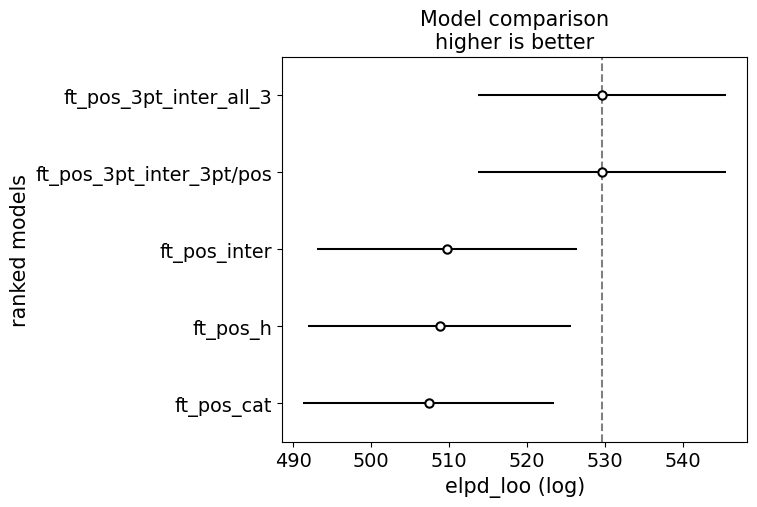

In [8]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=basketball).fit(idata_kwargs={"log_likelihood":True})
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=basketball).fit(idata_kwargs={"log_likelihood":True})
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=basketball).fit(idata_kwargs={"log_likelihood":True})
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=basketball).fit(idata_kwargs={"log_likelihood":True})
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter2, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The models that include 3 point attempts are the "best" among the compared models. Between the 2 with three-point attempts, the one that includes only interactions between 3PA and Pos is better than the one with interactions among all three predictors. This is shown by the highest elpd_loo value and the lowest rank in the comparison plot from task 10. This modely likely performs the best because it incorporates information about 3 point attempts and their interaction with a player's position, which are important factors in determining a basketball player's percentage. This is probably becuase players that attempt more 3 point shots are most likely better at scoring anyway as the more 3 point attempts you make, the more practice you get at shooting, which in turn improves your skill.